In [73]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.multitest as smm
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv
data = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv', sep='\t', header=11,index_col=0)
systematic_names = data.index

In [74]:
#not entirely obvious what the antisense data is, so I will just ignore this for the moment
#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv
#antisense = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv', sep='\t', header=17,index_col=0)
#load the proper gene desc map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
gene_desc = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv', sep='\t', header=None,)
#indices=[]
#for i in antisense.index:
#    if i in gene_desc[0].values:
#        #if there is a value in the second column, that is not nan
#        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
#            indices.append(gene_desc[gene_desc[0]==i][2].values[0])
#        else:
#           indices.append(i)
            
#   else:
#           indices.append(i)
            
#antisense.index=indices



#do same for data
indices_=[]
for i in data.index:
    if i in gene_desc[0].values:
        #if there is a value in the second column, that is not nan
        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
            indices_.append(gene_desc[gene_desc[0]==i][2].values[0])
        else:
            indices_.append(i)
            
    else:
            indices_.append(i)
            
data.index=indices_


In [75]:
#add anti to the gene_ids
#antisense.index = ['anti-'+i for i in antisense.index]
#concatenate the two dataframes
#data = pd.concat([data,antisense],axis=0)
data.head()

,sample_01,sample_02,sample_03,sample_04,sample_05,sample_06,sample_07,sample_08,sample_09,sample_10,...,sample_59,sample_60,sample_61,sample_62,sample_63,sample_64,sample_65,sample_66,sample_67,sample_68
mrx11,66,31,42,29,22,74,67,61,78,117,...,110,67,70,85,56,30,115,44,48,42
pom34,302,180,420,305,210,480,517,491,672,618,...,647,520,513,450,344,331,568,252,326,285
gls2,2136,1439,2109,2101,1315,2166,2993,2298,3532,2568,...,2147,2286,2408,1618,1989,1624,2662,1163,1545,1102
taf11,195,139,256,200,197,307,342,324,407,269,...,412,499,438,287,305,335,360,245,244,300
jmj2,135,83,149,132,94,191,197,178,269,225,...,264,247,277,212,245,170,261,107,165,122


In [76]:
#load sample - genotype map from /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx
map = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx',header=None)
map.columns = ['sample','genotype']
#save genotypes
true_genotypes = map['genotype']
#if a genotype is in the list more than once, put an number after it
for i in map.genotype.unique():
    if i in map.genotype.value_counts()[map.genotype.value_counts()>1].index:
        map.loc[map.genotype==i,'genotype'] = [str(i)+"_rep_"+str(int(j)+1) for j in range(map.genotype.value_counts()[i])]


for i in data.columns:
    ind = np.where(map["sample"]==i)[0]
    #rename the ind-th column of data to the genotype of the sample
    data.rename(columns={i:map["genotype"][ind].values[0]},inplace=True)
data.head()

,R1_1_rep_1,R1_2,R1_4_rep_1,R1_3_rep_1,R1_5_rep_1,R1_6_rep_1,R1_7_rep_1,R1_8_rep_1,R1_9_rep_1,R1_10_rep_1,...,R1_4_rep_2,R1_5_rep_2,R1_6_rep_2,R1_7_rep_2,R1_8_rep_2,R1_9_rep_2,R1_10_rep_2,swc5_del_rep_1,swc5_del_rep_2,swc5_del_rep_3
mrx11,66,31,42,29,22,74,67,61,78,117,...,110,67,70,85,56,30,115,44,48,42
pom34,302,180,420,305,210,480,517,491,672,618,...,647,520,513,450,344,331,568,252,326,285
gls2,2136,1439,2109,2101,1315,2166,2993,2298,3532,2568,...,2147,2286,2408,1618,1989,1624,2662,1163,1545,1102
taf11,195,139,256,200,197,307,342,324,407,269,...,412,499,438,287,305,335,360,245,244,300
jmj2,135,83,149,132,94,191,197,178,269,225,...,264,247,277,212,245,170,261,107,165,122


In [77]:
#save column names and indices, then create a numpy matrix of the data
col_names = data.columns
ind_names = data.index
data = data.values
data

array([[  66,   31,   42, ...,   44,   48,   42],
       [ 302,  180,  420, ...,  252,  326,  285],
       [2136, 1439, 2109, ..., 1163, 1545, 1102],
       ...,
       [  17,    0,    6, ...,   12,   11,   11],
       [  30,    8,   57, ...,   21,   19,   26],
       [   6,    4,   14, ...,   13,   14,   13]])

In [78]:
#perform deseq2 noramlisation on the data
#calculate row-wise geometric means
row_means = np.exp(np.mean(np.log(data+1),axis=1))
#create a matrix with the ratios of the datapoints to the row means
data_ = data/row_means[:,None]
#take the median of the ratios in each column
col_medians = np.median(data_,axis=0)
#divide data in each column by the median of the ratios in that column
data_ = data/col_medians


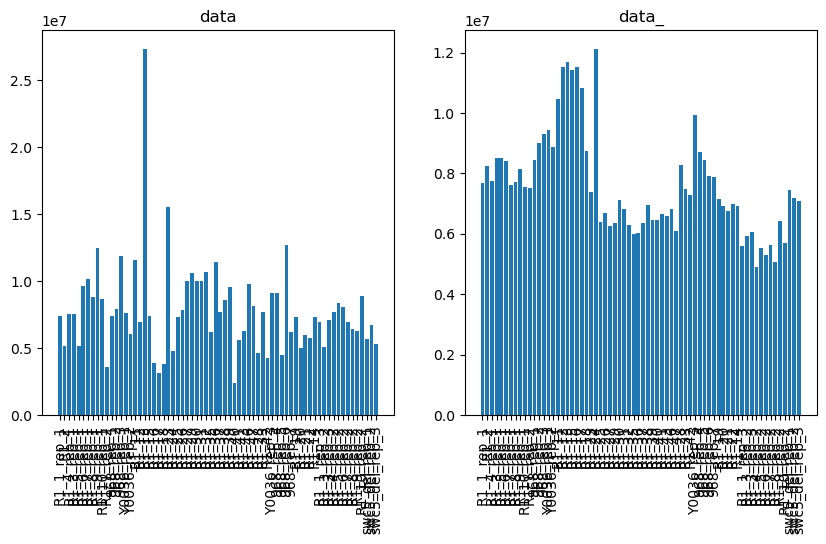

In [79]:
#plot the column totals in data and in data_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(len(col_names)),np.sum(data,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data')
plt.subplot(1,2,2)
plt.bar(range(len(col_names)),np.sum(data_,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data_')
plt.show()


In [80]:
#import washing phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/washing_phenotypes.csv
washing = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Phenotypes/phenotype_s.csv',header=0,index_col=0)
#keep first two cols
washing = washing.iloc[:,:2]
washing.columns = ['genotype','phenotype']
#import filtering phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/filtering_phenotypes.csv
filtering = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste original code/QTL mapping/filtering_phenotypes.csv',header=0,index_col=0)
filtering.columns = ['genotype','phenotype']
#merge the two dataframes by genotype, and name the phenotypes washing and filtering
phenotypes = pd.merge(washing,filtering,on='genotype')
phenotypes.columns = ['genotype','washing','filtering']

In [81]:
#create an array called genotypes_to_retain, which has the entries from true_genotypes removing _rep_1 and _rep_2
genotypes_to_retain = [i.split('_rep_')[0] for i in true_genotypes]
#only retain the ones that are in the phenotypes dataframe
genotypes_to_retain = [i for i in genotypes_to_retain if i in phenotypes.genotype.values]
#subset col_names to include only the genotypes that are in genotypes_to_retain, or those + _rep_...
col_names_retained = [i for i in col_names if i in genotypes_to_retain or i.split('_rep_')[0] in genotypes_to_retain]
#index of which col_names were retained
ind = [i in col_names_retained for i in col_names]
#subset the data to only include the genotypes in genotypes_to_retain in the same order
data_full = data_.copy()
data_ = data_[:,ind]

#subset the phenotypes to only include the genotypes in genotypes_to_retain
#phenotypes = phenotypes[[i in genotypes_to_retain for i in phenotypes.genotype]]

In [82]:
col_names_retained_wo_reps = [i.split('_rep_')[0] for i in col_names_retained]
import scipy.stats as st
#create a new df for phenotypes with reordering phenotypes such that genotype matches the order of those in col_names_retained_wo_reps
phenotypes_ = pd.DataFrame(columns=['genotype','washing','filtering'])
for i in col_names_retained_wo_reps:
    phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
phenotypes_.index = range(len(phenotypes_))
phenotypes_
#extrac the two phenotypes as arrays from the df
washing = phenotypes_['washing'].values
filtering = phenotypes_['filtering'].values


def find_correlated_genes(data,phenotype, only_sig=True, add_function=True,systematic_names=systematic_names ):
    df = pd.DataFrame(columns=['gene','correlation','p-value'])
    with warnings.catch_warnings():
        for i in range(data.shape[0]):
            cor = st.spearmanr(data[i,:],phenotype)[:2]
            df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1],"systematic_names":systematic_names[i]},ignore_index=True)
    #remove every row that has NaN for p-value
    df = df.dropna(subset=['p-value'])
    #perform BH correction

    df['p-value adj'] = smm.fdrcorrection(df['p-value'])[1]
    #order by p-value
    df = df.sort_values(by='p-value')
    #only retain significant ones
    if only_sig:
        df = df[df['p-value adj']<0.05]
    #for each gene add the function (column 4 in gene_desc)
    if add_function:
        #find the row in gene_desc where the gene name matches either the entry in column 0 or 2
        #add the function from column 4 to the df
        df['function'] = [gene_desc.loc[(gene_desc[0]==i) | (gene_desc[2]==i),4].to_string(index=False)  for i in df.gene]
        #if entry in function is 'Series([], )' then replace with 'unknown'
        df['function'] = [i if i!='Series([], )' else 'unknown' for i in df['function']]
        #if gene name has -antisense- in it, then look for what is after that, and see if it has a function
        #if it does, then add that function to the df
        df["sense function"] = df["function"]
        for i in range(df.shape[0]):
            if '-antisense-' in df.gene.values[i]:
                #find the gene name before -antisense-
                gene_name = df.gene.values[i].split('-antisense-')[0]
                #find the function of that gene
                function = gene_desc.loc[(gene_desc[0]==gene_name) | (gene_desc[2]==gene_name),4].to_string(index=False)
                #if the function is not 'Series([], )' then add it to the df
                if function!='Series([], )':
                    df['sense function'].values[i] = function
                else:
                    df['sense function'].values[i] = 'unknown'

    return df


In [83]:
with warnings.catch_warnings():
    wash_df = find_correlated_genes(data_,washing,only_sig=False)
    filt_df = find_correlated_genes(data_,filtering,only_sig=False)
    

Text(0.5, 1.0, 'Correlation of gene expression with washing phenotype')

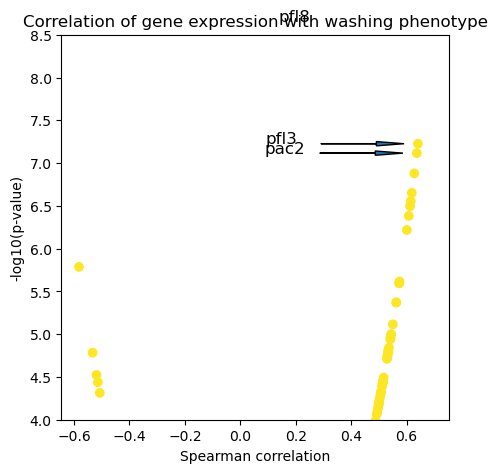

In [84]:
#create volcano plot for wash_df color hits above bonferroni threshold
#create large figure
plt.figure(figsize=(5,5))
plt.scatter(wash_df['correlation'],-np.log10(wash_df['p-value']),c=wash_df['p-value adj']<0.05)
#label top 3 hits with gene name left of the gene and arrow pointing to the gene
for i in range(3):
    plt.text(wash_df['correlation'].values[i]-0.55,-np.log10(wash_df['p-value'].values[i]),wash_df['gene'].values[i],fontsize=12)
    plt.arrow(wash_df['correlation'].values[i]-0.35,-np.log10(wash_df['p-value'].values[i]),0.2,0,head_width=0.05,head_length=0.1)
#show figure from 4 upwards
plt.ylim(4,8.5)
plt.xlabel('Spearman correlation')
plt.ylabel('-log10(p-value)')
plt.title('Correlation of gene expression with washing phenotype')


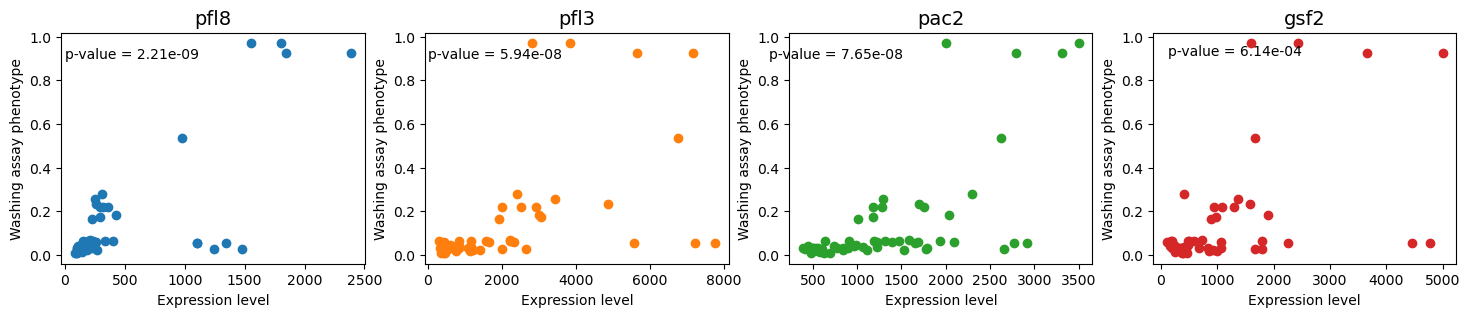

In [85]:
#create publication quality plots side by side for the top 3 genes and gsf2 vs washing. Use different colors and nice fonts. 

fig,ax = plt.subplots(1,4,figsize=(18,3))
for i,col in zip(range(4),['#1f77b4','#ff7f0e','#2ca02c', '#d62728']):
    if i==3:
        ax[i].scatter(data_[ind_names=='gsf2',:],washing,c=col)
        ax[i].set_title("gsf2",fontsize=14)
        ax[i].set_xlabel('Expression level',fontsize=10)
        ax[i].set_ylabel('Washing assay phenotype',fontsize=10)
        
        ax[i].tick_params(labelsize=10)
        #put p-value from wash_df p-value column to 2 significant figures in scientific notation
        ax[i].text(0.05,0.9,'p-value = {:.2e}'.format(wash_df['p-value'].values[wash_df["gene"]=="gsf2"][0]),transform=ax[i].transAxes,fontsize=10)
    else:
        ax[i].scatter(data_[ind_names==wash_df.gene.values[i],:],washing,c=col)
    
        

        ax[i].set_title(wash_df.gene.values[i],fontsize=14)
        ax[i].set_xlabel('Expression level',fontsize=10)
        ax[i].set_ylabel('Washing assay phenotype',fontsize=10)
        
        ax[i].tick_params(labelsize=10)
        #put p-value from wash_df p-value column to 2 significant figures in scientific notation
        ax[i].text(0.05,0.9,'p-value = {:.2e}'.format(wash_df['p-value'].values[i]))

    
    


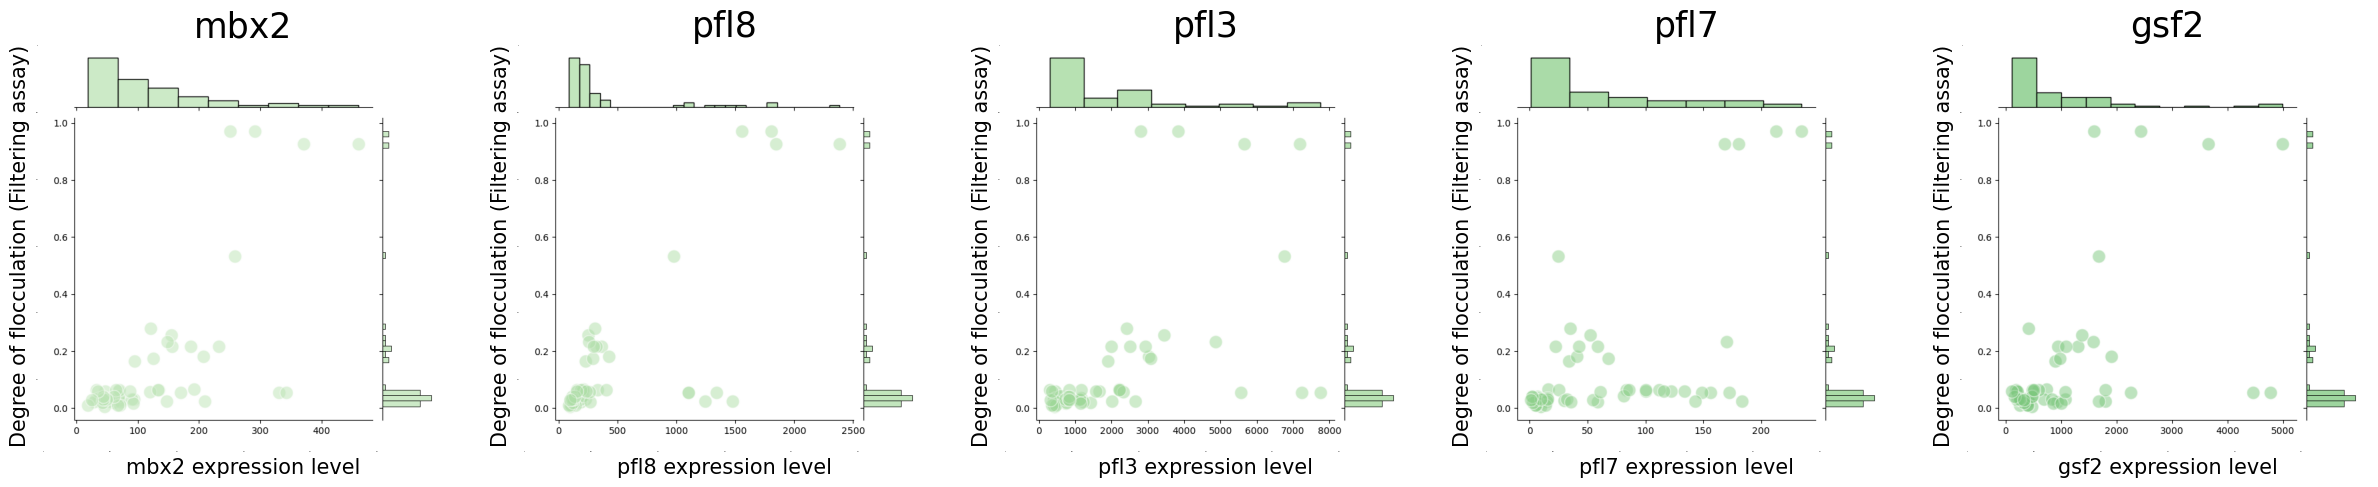

In [86]:
colors = sns.color_palette("Greens", 20)
#put 5 of these in a row by saving them as images and the using the image function in matplotlib
for i,j,col in zip(range(5),["mbx2","pfl8",  "pfl3","pfl7","gsf2"],colors[5:]):
    plt.figsize=(10,10)
    #large glyph with alpha transparency
    sns.jointplot(data_[ind_names==j,:][0],washing,kind='scatter',color=col, alpha=0.5,s=200)
    #axis
    plt.xlabel('mbx2 expression level')
    #add p value
    #larger numbers next to the axis
    

#print corr coef
    plt.text(-200,0.7,'Spearman r = {:.2f}'.format(st.spearmanr(data_[ind_names==j,:][0],washing)[0]),fontsize=15)
    plt.text(-200,0.6,'P-value = {:.2e}'.format(st.spearmanr(data_[ind_names==j,:][0],washing)[1]),fontsize=15)
    plt.savefig('jointplot{}.png'.format(i))
    plt.close()
    
for i,j in zip(range(5),["mbx2","pfl8",  "pfl3","pfl7","gsf2"]):
    #load them and arange in one big plot
    
    plt.subplot(1,5,i+1)
    #read big figure
    plt.imshow(plt.imread('jointplot{}.png'.format(i)))
    #increase size
    plt.gcf().set_size_inches(30,30)
    plt.title(["mbx2","pfl8",  "pfl3","pfl7","gsf2"][i],fontsize=25)
    plt.axis('off')
    plt.axis('on')
    plt.ylabel('Degree of flocculation (Filtering assay)',fontsize=15)
    plt.xlabel('{} expression level'.format(j),fontsize=15)
    #remove ticks
    plt.tick_params(labelsize=0)
    #remove frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    #remove the ticks of the outer frame
    plt.gca().tick_params(axis='both', which='both', length=0)
  


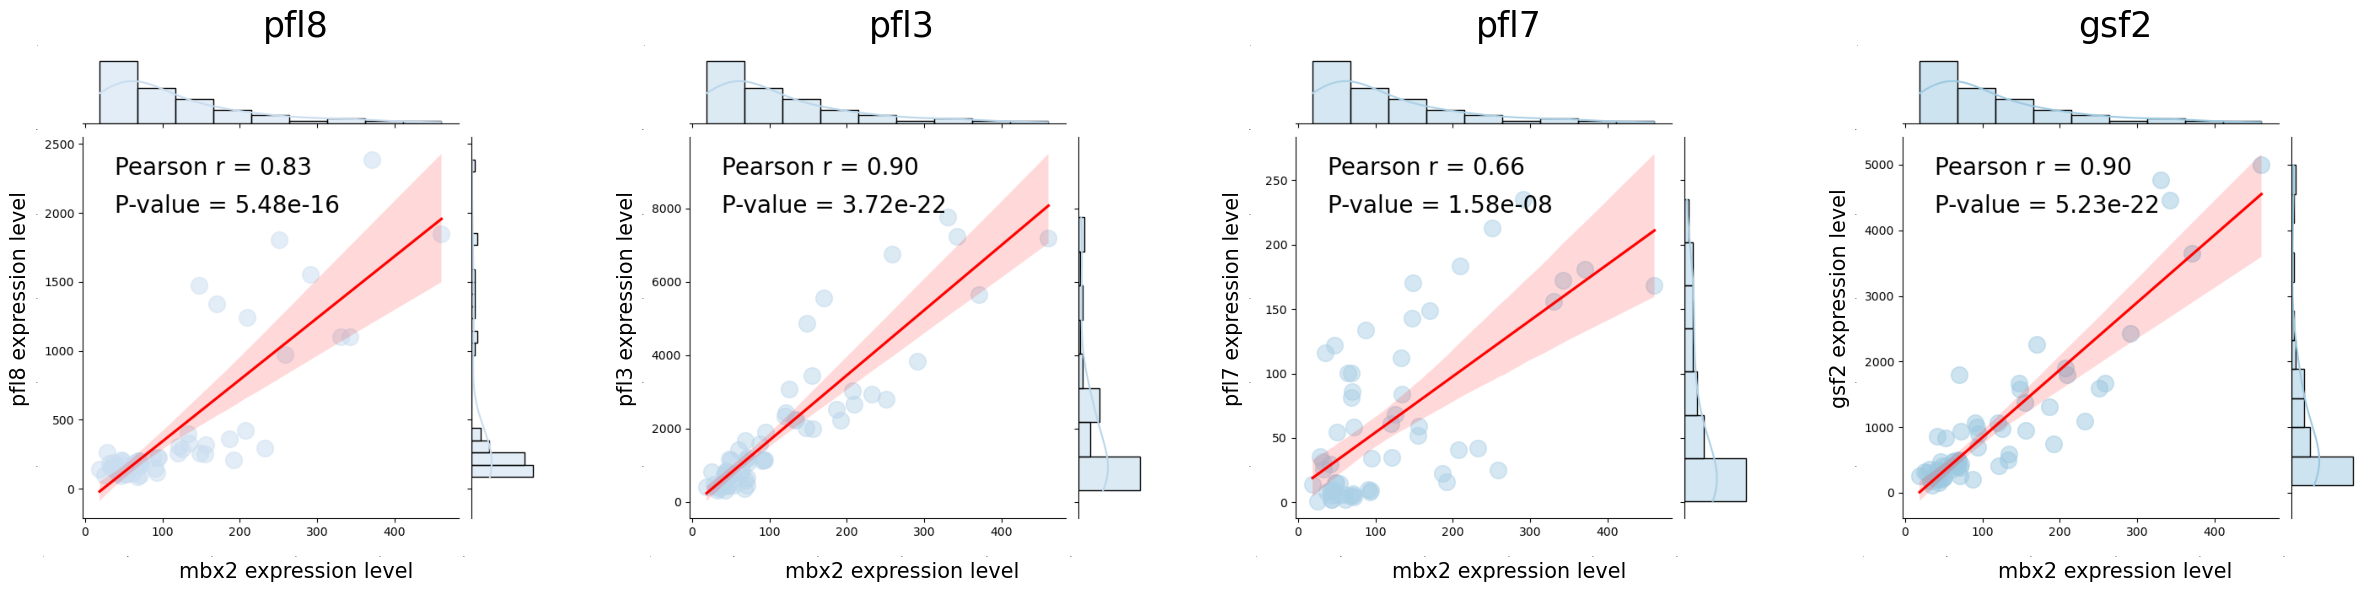

In [87]:
colors = sns.color_palette("Blues", 20)
#put 5 of these in a row by saving them as images and the using the image function in matplotlib
for i,j,col in zip(range(4),["pfl8",  "pfl3","pfl7","gsf2"],colors[4:]):
    plt.figsize=(10,10)
    #large glyph with alpha transparency
    sns.jointplot(data_[ind_names=='mbx2',:][0],data_[ind_names==j,:][0],kind='reg',color=col,joint_kws={'line_kws':{'color':'red'}},scatter_kws={'alpha':0.5,'s':200})
    #axis
    plt.xlabel('mbx2 expression level')
    #add p value
    #larger numbers next to the axis
    

#print corr coef
    plt.text(-5.5,0.9,'Pearson r = {:.2f}'.format(st.pearsonr(data_[ind_names==j,:][0],data_[ind_names=='mbx2',:][0])[0]),transform=plt.gca().transAxes,fontsize=20)
    plt.text(-5.5,0.8,'P-value = {:.2e}'.format(st.pearsonr(data_[ind_names==j,:][0],data_[ind_names=='mbx2',:][0])[1]),transform=plt.gca().transAxes,fontsize=20)
    plt.ylabel('{} expression level'.format(j))
    plt.savefig('jointplot{}.png'.format(i))
    plt.close()
    
for i,j in zip(range(4),["pfl8",  "pfl3","pfl7","gsf2"]):
    #load them and arange in one big plot
    
    plt.subplot(1,4,i+1)
    #read big figure
    plt.imshow(plt.imread('jointplot{}.png'.format(i)))
    #increase size
    plt.gcf().set_size_inches(30,30)
    plt.title(["pfl8",  "pfl3","pfl7","gsf2"][i],fontsize=25)
    plt.axis('off')
    plt.axis('on')
    plt.xlabel('mbx2 expression level',fontsize=15)
    plt.ylabel('{} expression level'.format(j),fontsize=15)
    #remove ticks
    plt.tick_params(labelsize=0)
    #remove frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    #remove the ticks of the outer frame
    plt.gca().tick_params(axis='both', which='both', length=0)

#create big x axis label for the whole figure

    
    

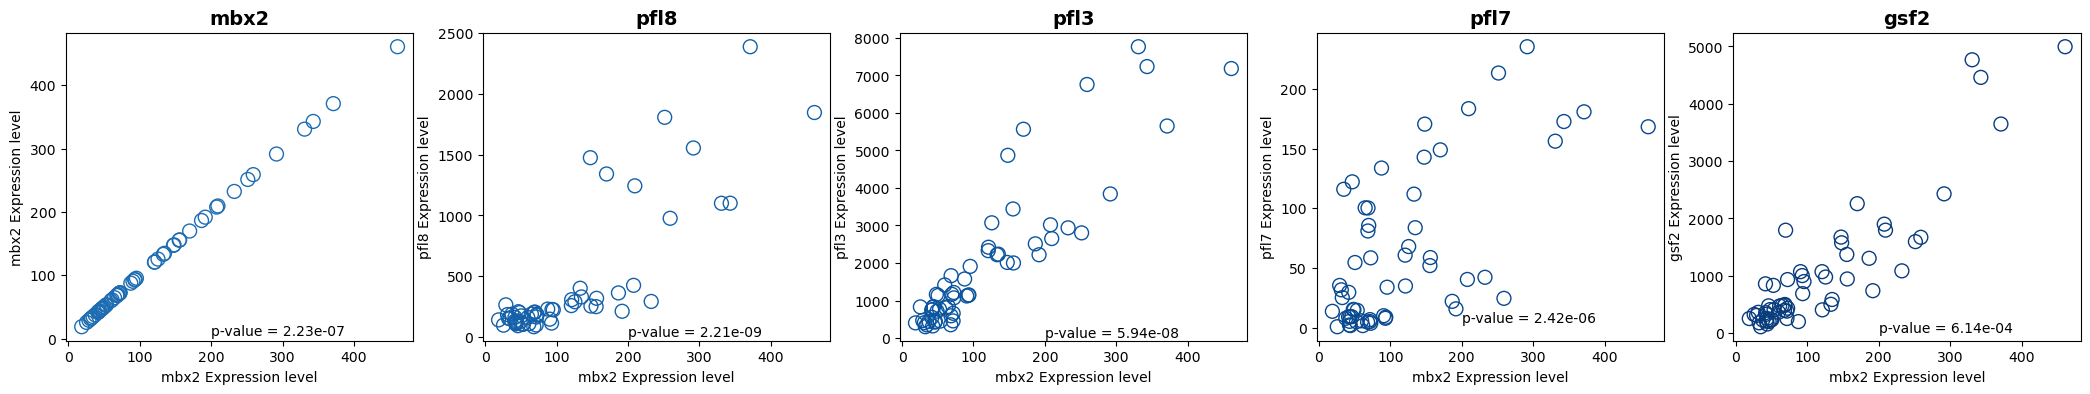

In [88]:
#plot mbx2 against pfl8, pfl3, pf7, gsf2 and show genotype names
fig,ax = plt.subplots(1,5,figsize=(26,4))
colors = sns.color_palette("Blues", 20)
for i,j,col in zip(range(5),["mbx2","pfl8",  "pfl3","pfl7","gsf2"],colors[15:]):
    ax[i].scatter(data_[ind_names=="mbx2",:],data_[ind_names==j,:],marker='o',edgecolors=col,facecolors='none', s= 100)
    ax[i].set_title(j,fontsize=14)
    ax[i].set_xlabel('mbx2 Expression level',fontsize=10)
    ax[i].set_ylabel(str(j)+' Expression level',fontsize=10)
    ax[i].tick_params(labelsize=10)
    #bold
    ax[i].title.set_fontweight('bold')
    #put p-value from filt_df p-value column to 2 significant figures in scientific notation
    #y value at 80% of y axis
    ax[i].text(200,5,'p-value = {:.2e}'.format(wash_df['p-value'].values[wash_df["gene"]==j][0]))
    

Plotting ncRNA vs mbx2


In [89]:
snps = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/permutations/results.csv')
snps['chromosome'] = snps['chromosome'].str.replace('chromosome_', '')
#change chromosome number to roman numbers
snps['chromosome'] = snps['chromosome'].str.replace('1','I')
snps['chromosome'] = snps['chromosome'].str.replace('2','II')
snps['chromosome'] = snps['chromosome'].str.replace('3','III')
snps.loc[snps["position"]==2527314]

,Unnamed: 0,chromosome,position,X968_allele,Y0036_allele,X968,Y0036,R1_1,R1_2,R1_3,...,R1_37,R1_38,R1_39,R1_40,R1_41,R1_42,R1_43,R1_46,R1_47,R1_9
12,2255,II,2527314,G,A,0,1,1.0,0,0,...,0.0,0,1,0.0,0.0,0.0,0.0,0,0.0,0


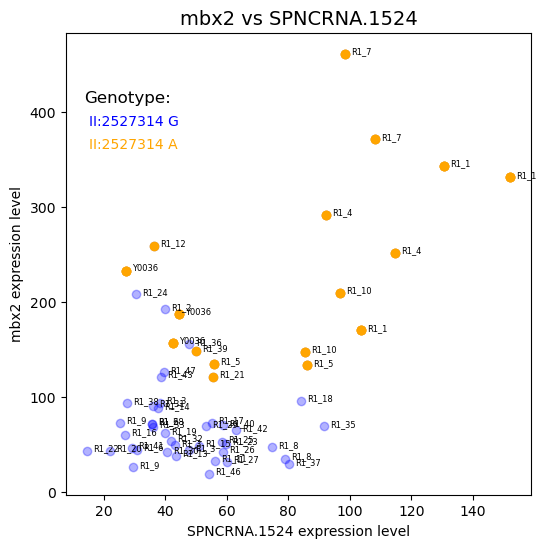

In [90]:
#create a plot of SPNCRNA.1524 vs mbx2
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(data_[ind_names=='SPNCRNA.1524',:],data_[ind_names=='mbx2',:],c='blue',alpha=0.3)
ax.set_title("mbx2 vs SPNCRNA.1524",fontsize=14)
for i in col_names_retained_wo_reps:
    if (snps.loc[snps["position"]==2527314,i].values==1)[0]:
        indices_to_plot= np.array(np.where(np.array(col_names_retained_wo_reps)==i)).flatten()
        ax.scatter(data_[ind_names=='SPNCRNA.1524',indices_to_plot],data_[ind_names=='mbx2',indices_to_plot],c='orange')


ax.set_xlabel('SPNCRNA.1524 expression level',fontsize=10)
ax.set_ylabel('mbx2 expression level',fontsize=10)
ax.tick_params(labelsize=10)
strains_with_0 = data_[ind_names=='SPNCRNA.1524',np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==0)[1]]
strains_with_1 = data_[ind_names=='SPNCRNA.1524',np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==1)[1]]

#make legend at top left corner in a box titled genotype show that red is II:2524266 C and blue is II:2524266 T
ax.text(0.04,0.85,'Genotype:',transform=ax.transAxes,fontsize=12)
ax.text(0.05,0.8,'II:2527314 G',transform=ax.transAxes,fontsize=10,color='blue')
ax.text(0.05,0.75,'II:2527314 A',transform=ax.transAxes,fontsize=10,color='orange')


for i in range(data_[ind_names=='SPNCRNA.1524',:].shape[1]):
    #small text
    plt.text(data_[ind_names=='SPNCRNA.1524',:][0,i]+2,data_[ind_names=='mbx2',:][0,i],col_names_retained_wo_reps[i],fontsize=6)




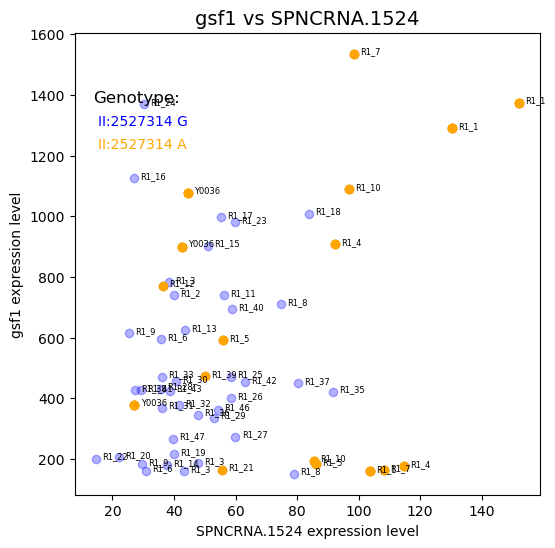

In [91]:
#same plot for SPNCRNA.1524 vs gsf1
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(data_[ind_names=='SPNCRNA.1524',:],data_[ind_names=='gsf1',:],c='blue',alpha=0.3)
ax.set_title("gsf1 vs SPNCRNA.1524",fontsize=14)

for i in col_names_retained_wo_reps:
      if (snps.loc[snps["position"]==2527314,i].values==1)[0]:
            indices_to_plot= np.array(np.where(np.array(col_names_retained_wo_reps)==i)).flatten()
            ax.scatter(data_[ind_names=='SPNCRNA.1524',indices_to_plot],data_[ind_names=='gsf1',indices_to_plot],c='orange')


            
ax.set_xlabel('SPNCRNA.1524 expression level',fontsize=10)
ax.set_ylabel('gsf1 expression level',fontsize=10)
ax.tick_params(labelsize=10)
strains_with_0 = data_[ind_names=='SPNCRNA.1524',np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==0)[1]]

#make legend at top left corner in a box titled genotype show that red is II:2524266 C and blue is II:2524266 T
ax.text(0.04,0.85,'Genotype:',transform=ax.transAxes,fontsize=12)
ax.text(0.05,0.8,'II:2527314 G',transform=ax.transAxes,fontsize=10,color='blue')
ax.text(0.05,0.75,'II:2527314 A',transform=ax.transAxes,fontsize=10,color='orange')


for i in range(data_[ind_names=='SPNCRNA.1524',:].shape[1]):
      #small text
      plt.text(data_[ind_names=='SPNCRNA.1524',:][0,i]+2,data_[ind_names=='gsf1',:][0,i],col_names_retained_wo_reps[i],fontsize=6)
      


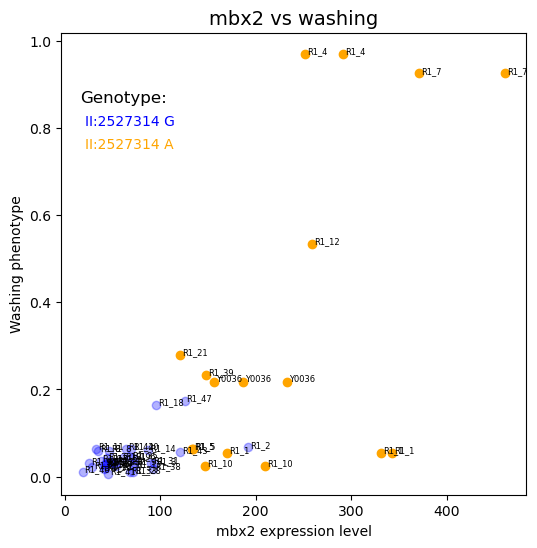

In [92]:
#plot mbx2 vs washing for the two genotypes
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(data_[ind_names=='mbx2',np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==0)[1]],washing[np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==0)[1]],c='blue',alpha=0.3)
ax.scatter(data_[ind_names=='mbx2',np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==1)[1]],washing[np.where(snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values==1)[1]],c='orange',alpha=1)
ax.set_title("mbx2 vs washing",fontsize=14)
ax.set_xlabel('mbx2 expression level',fontsize=10)
ax.set_ylabel('Washing phenotype',fontsize=10)
ax.tick_params(labelsize=10)
#make legend at top left corner in a box titled genotype show that red is II:2524266 C and blue is II:2524266 T
ax.text(0.04,0.85,'Genotype:',transform=ax.transAxes,fontsize=12)
ax.text(0.05,0.8,'II:2527314 G',transform=ax.transAxes,fontsize=10,color='blue')
ax.text(0.05,0.75,'II:2527314 A',transform=ax.transAxes,fontsize=10,color='orange')
#add names of strains to the plot at the exact same points if they ahve 1 with font size 6 and if they have 0 with font size 4
for i in range(data_[ind_names=='mbx2',:].shape[1]):
    if (snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values[0,i]==1):
        plt.text(data_[ind_names=='mbx2',:][0,i]+2,washing[i],col_names_retained_wo_reps[i],fontsize=6)
    elif (snps.loc[snps["position"]==2527314,col_names_retained_wo_reps].values[0,i]==0):
        plt.text(data_[ind_names=='mbx2',:][0,i]+2,washing[i],col_names_retained_wo_reps[i],fontsize=6)
    



In [93]:
#which colname is R1_36, find the correspoidng washing data

In [94]:
#iterate through dataset and see the expression of which genes differs between strains with 0 and 1. Evaluat difference w t test
diff_exp_snp_df = pd.DataFrame(columns=['gene','p-value'])
for i in range(data_.shape[0]):
    strains_with_0 = data_[i,np.where(snps.loc[snps["position"]==2524266,col_names_retained_wo_reps].values==0)[1]]
    strains_with_1 = data_[i,np.where(snps.loc[snps["position"]==2524266,col_names_retained_wo_reps].values==1)[1]]
    diff_exp_snp_df = diff_exp_snp_df.append({'gene':ind_names[i],'p-value':st.ttest_ind(strains_with_0,strains_with_1)[1],"t_stat":st.ttest_ind(strains_with_0,strains_with_1)[0]},ignore_index=True)

#sort by p-value and descending t_stat
diff_exp_snp_df = diff_exp_snp_df.sort_values(by=['p-value','t_stat'],ascending=[True,False])
diff_exp_snp_df.head(50)



,gene,p-value,t_stat
3423,mbx2,4.281634e-13,-9.435926
4038,pfl3,1.949952e-11,-8.400441
5696,pof9-antisense-1,2.194838e-11,-8.368721
807,pfl8,1.158687e-10,-7.924306
1811,gmh1,1.453501e-09,-7.252754
6431,SPNCRNA.72,1.725607e-09,-7.207274
5268,SPNCRNA.1083,1.937257e-09,-7.176612
506,mfs1,2.557636e-09,-7.102985
1426,pac2,2.815436e-09,-7.077533
2406,dea2,3.533120e-09,-7.017348


In [95]:
diff_exp_snp_df = diff_exp_snp_df.sort_values(by=['t_stat','p-value'],ascending=[False,True])
diff_exp_snp_df.head(50)

,gene,p-value,t_stat
3625,fnx2,8.948836e-07,5.535221
4250,wtf10,2.026308e-06,5.310876
560,psc3,3.003709e-06,5.201953
6688,SPAPB15E9.02c-antisense-1,4.640400e-06,5.080849
3018,SPBC19C7.11,5.561288e-06,5.030195
460,bsu1,7.639795e-06,4.940963
3434,srb4,8.508564e-06,4.910582
2419,alg2,1.390778e-05,4.771182
329,SPAC15A10.06,1.521011e-05,4.745641
1154,ypf1,1.653181e-05,4.721821


In [96]:
#sort by p-value
diff_exp_snp_df = diff_exp_snp_df.sort_values(by='p-value')


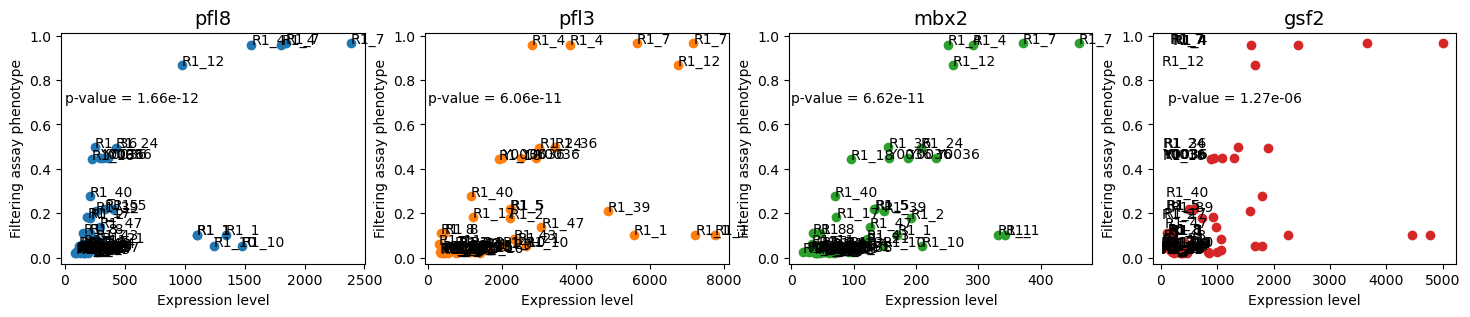

In [97]:
#repeat plot and show strain names
fig,ax = plt.subplots(1,4,figsize=(18,3))
for i,col in zip(range(4),['#1f77b4','#ff7f0e','#2ca02c', '#d62728']):
    if i==3:
        ax[i].scatter(data_[ind_names=='gsf2',:],filtering,c=col)
        ax[i].set_title("gsf2",fontsize=14)
        ax[i].set_xlabel('Expression level',fontsize=10)
        ax[i].set_ylabel('Filtering assay phenotype',fontsize=10)
        
        ax[i].tick_params(labelsize=10)
        #put p-value from wash_df p-value column to 2 significant figures in scientific notation
        ax[i].text(0.05,0.7,'p-value = {:.2e}'.format(filt_df['p-value'].values[filt_df["gene"]=="gsf2"][0]),transform=ax[i].transAxes,fontsize=10)
    else:
        ax[i].scatter(data_[ind_names==filt_df.gene.values[i],:],filtering,c=col)
    
        

        ax[i].set_title(filt_df.gene.values[i],fontsize=14)
        ax[i].set_xlabel('Expression level',fontsize=10)
        ax[i].set_ylabel('Filtering assay phenotype',fontsize=10)
        
        ax[i].tick_params(labelsize=10)
        #put p-value from wash_df p-value column to 2 significant figures in scientific notation
        ax[i].text(0.05,0.7,'p-value = {:.2e}'.format(filt_df['p-value'].values[i]))

    
    #add strain names from phenotypes_ "genotype""
    for j in range(data_.shape[1]):
        ax[i].text(data_[ind_names==filt_df.gene.values[i],:][0,j],filtering[j],phenotypes_["genotype"][j],fontsize=10)

In [98]:
#which genotypes have higher than median mbx2 and lower than median filtering phenotype?
higher_mbx = phenotypes_["genotype"][data_[ind_names=='mbx2',:][0,:]>np.median(data_[ind_names=='mbx2',:][0,:])]
lower_filt = phenotypes_["genotype"][filtering<0.25]
#find union
a = set(higher_mbx).intersection(set(lower_filt))
#same with pfl8
higher_pfl8 = phenotypes_["genotype"][data_[ind_names=='pfl8',:][0,:]>np.median(data_[ind_names=='pfl8',:][0,:])]
b= set(higher_pfl8).intersection(set(lower_filt))
#same with pfl3
higher_pfl3 = phenotypes_["genotype"][data_[ind_names=='pfl3',:][0,:]>np.median(data_[ind_names=='pfl3',:][0,:])]
c = set(higher_pfl3).intersection(set(lower_filt))
#same witg gsf2
higher_gsf = phenotypes_["genotype"][data_[ind_names=='gsf2',:][0,:]>np.median(data_[ind_names=='gsf2',:][0,:])]
d = set(higher_gsf).intersection(set(lower_filt))
from collections import Counter
Counter(list(a)+list(b)+list(c)+list(d)).most_common(10)

[('R1_1', 4),
 ('R1_5', 4),
 ('R1_39', 4),
 ('R1_43', 4),
 ('R1_10', 4),
 ('R1_2', 4),
 ('R1_47', 4),
 ('R1_17', 3),
 ('R1_3', 3),
 ('R1_21', 3)]

In [99]:
#repeat for washing
higher_mbx = phenotypes_["genotype"][data_[ind_names=='mbx2',:][0,:]>np.median(data_[ind_names=='mbx2',:][0,:])]
lower_wash = phenotypes_["genotype"][washing<np.median(washing)]
#find union
a = set(higher_mbx).intersection(set(lower_wash))
#same with pfl8
higher_pfl8 = phenotypes_["genotype"][data_[ind_names=='pfl8',:][0,:]>np.median(data_[ind_names=='pfl8',:][0,:])]
b= set(higher_pfl8).intersection(set(lower_wash))
#same with pfl3
higher_pfl3 = phenotypes_["genotype"][data_[ind_names=='pfl3',:][0,:]>np.median(data_[ind_names=='pfl3',:][0,:])]
c = set(higher_pfl3).intersection(set(lower_wash))
#same witg gsf2
higher_gsf = phenotypes_["genotype"][data_[ind_names=='gsf2',:][0,:]>np.median(data_[ind_names=='gsf2',:][0,:])]
d = set(higher_gsf).intersection(set(lower_wash))
Counter(list(a)+list(b)+list(c)+list(d)).most_common(10)


[('R1_10', 4),
 ('R1_17', 3),
 ('R1_3', 3),
 ('R1_31', 2),
 ('R1_38', 2),
 ('R1_9', 1),
 ('R1_37', 1),
 ('R1_15', 1),
 ('R1_16', 1),
 ('R1_25', 1)]

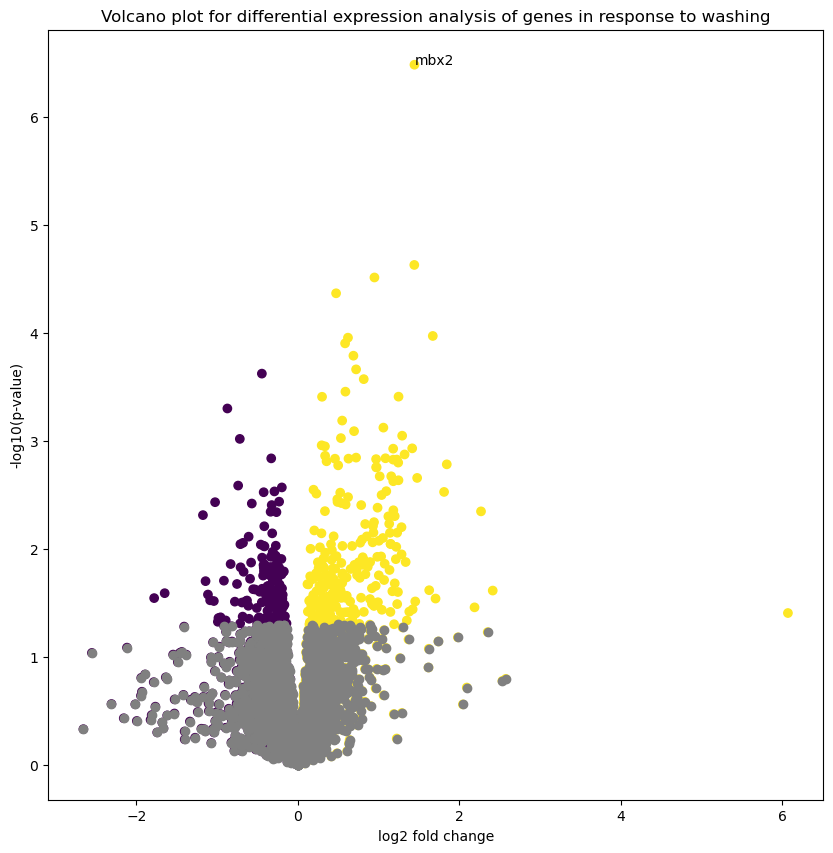

In [100]:
#add a new column for phenotype, where if washing is above 0.25, then it is 1, otherwise 0
phenotypes_['wash_pheno'] = [1 if i>0.2 else 0 for i in phenotypes_.washing]
#add new column for being either R1_10,R1_38,R1_29
phenotypes_['outlier'] = [1 if i in ['R1_1',"R1_10"] else 0 for i in phenotypes_.genotype]
#add a new column for phenotype, where if filtering is above 0.25, then it is 1, otherwise 0
phenotypes_['filter_pheno'] = [1 if i>0.2 else 0 for i in phenotypes_.filtering]
#perform differential expression analysis in data_ for those genotypes that have wash_pheno==1 vs those that have wash_pheno==0
#take the mean for each group, then divide them and take the log2 and get p-value
#create a results df, with columns gene, log2 fold change, p-value
wash_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.wash_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.wash_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.wash_pheno==0],data_[i,phenotypes_.wash_pheno==1])[1]
    #add the results to the df
    wash_results = wash_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
wash_results = wash_results.dropna()
#perform bonferroni correction
wash_results['p-value adj'] = wash_results['p-value']*wash_results.shape[0]
#order by p-value
wash_results = wash_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot

#create a large figure
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(wash_results['log2 fold change'],-np.log10(np.array(wash_results['p-value']+10**-100,dtype=float)),c=wash_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(wash_results['log2 fold change'][wash_results['p-value']>0.05],-np.log10(np.array(wash_results['p-value'][wash_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to washing')
#label very highly significant points
for i in range(wash_results.shape[0]):
    if wash_results['p-value adj'].values[i]<0.01:
        plt.annotate(wash_results.gene.values[i],(wash_results['log2 fold change'].values[i],-np.log10(wash_results['p-value'].values[i])))
plt.show()



0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

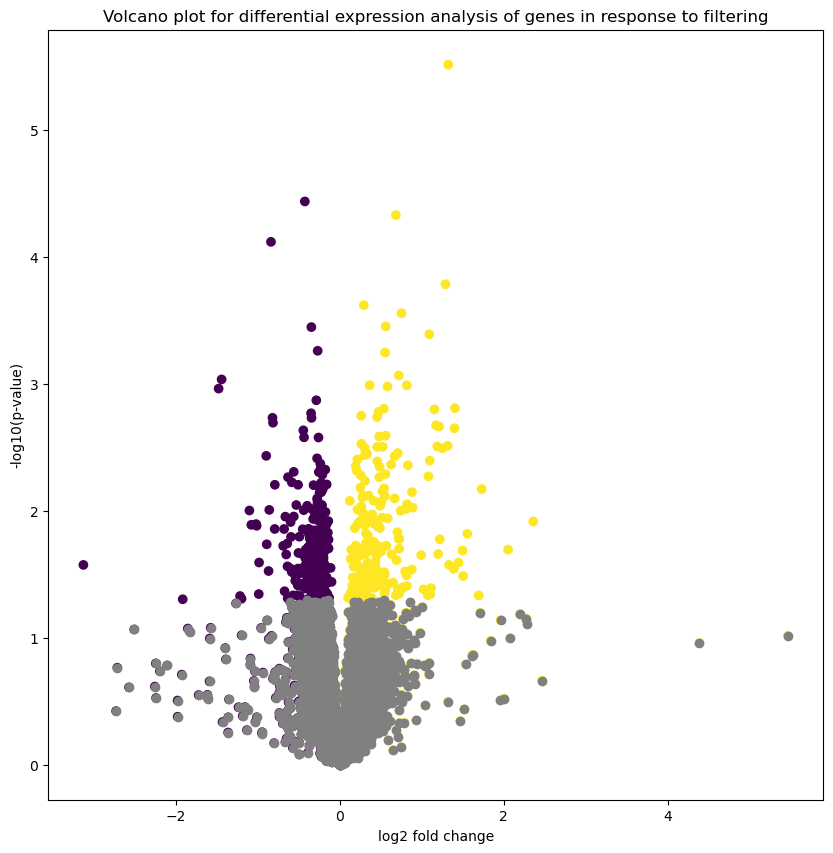

In [101]:
#do the same for filtering_results

filter_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.filter_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.filter_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.filter_pheno==0],data_[i,phenotypes_.filter_pheno==1])[1]
    #add the results to the df
    filter_results = filter_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
filter_results = filter_results.dropna()
#perform bonferroni correction
filter_results['p-value adj'] = filter_results['p-value']*filter_results.shape[0]
#order by p-value
filter_results = filter_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(filter_results['log2 fold change'],-np.log10(np.array(filter_results['p-value']+10**-100,dtype=float)),c=filter_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(filter_results['log2 fold change'][filter_results['p-value']>0.05],-np.log10(np.array(filter_results['p-value'][filter_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to filtering')
#label very highly significant points
for i in range(filter_results.shape[0]):
    if filter_results['p-value adj'].values[i]<0.01:
        plt.annotate(filter_results.gene.values[i],(filter_results['log2 fold change'].values[i],-np.log10(filter_results['p-value'].values[i])))



0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

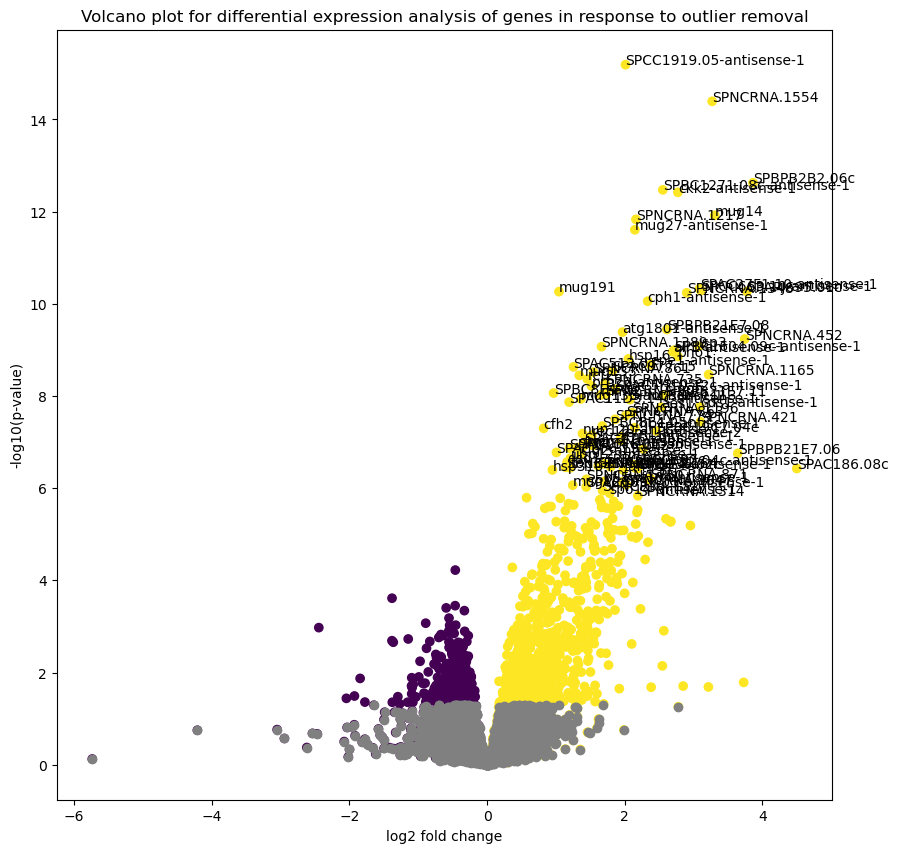

In [102]:
outlier_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.outlier==0])
    mean_1 = np.mean(data_[i,phenotypes_.outlier==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.outlier==0],data_[i,phenotypes_.outlier==1])[1]
    #add the results to the df
    outlier_results = outlier_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
outlier_results = outlier_results.dropna()
#perform bonferroni correction
outlier_results['p-value adj'] = outlier_results['p-value']*outlier_results.shape[0]
#order by p-value
outlier_results = outlier_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(outlier_results['log2 fold change'],-np.log10(np.array(outlier_results['p-value']+10**-100,dtype=float)),c=outlier_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray 
plt.scatter(outlier_results['log2 fold change'][outlier_results['p-value']>0.05],-np.log10(np.array(outlier_results['p-value'][outlier_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to outlier removal')
#label very highly significant points
for i in range(outlier_results.shape[0]):
    if outlier_results['p-value adj'].values[i]<0.01:
        plt.annotate(outlier_results.gene.values[i],(outlier_results['log2 fold change'].values[i],-np.log10(outlier_results['p-value'].values[i])))
plt.show()






In [103]:
col_names_retained_wo_reps

['R1_1',
 'R1_2',
 'R1_4',
 'R1_3',
 'R1_5',
 'R1_6',
 'R1_7',
 'R1_8',
 'R1_9',
 'R1_10',
 'R1_1',
 'Y0036',
 'Y0036',
 'R1_11',
 'R1_12',
 'R1_13',
 'R1_15',
 'R1_16',
 'R1_17',
 'R1_18',
 'R1_23',
 'R1_24',
 'R1_25',
 'R1_26',
 'R1_27',
 'R1_29',
 'R1_30',
 'R1_31',
 'R1_32',
 'R1_35',
 'R1_36',
 'R1_37',
 'R1_38',
 'R1_39',
 'R1_40',
 'R1_41',
 'R1_43',
 'R1_46',
 'R1_47',
 'R1_28',
 'R1_33',
 'R1_42',
 'Y0036',
 'R1_19',
 'R1_20',
 'R1_21',
 'R1_22',
 'R1_14',
 'R1_1',
 'R1_3',
 'R1_3',
 'R1_4',
 'R1_5',
 'R1_6',
 'R1_7',
 'R1_8',
 'R1_9',
 'R1_10']

R1_1
R1_1
R1_2
R1_4
R1_4
R1_3
R1_5
R1_5
R1_6
R1_7
R1_7
R1_8
R1_9
R1_10
R1_10
R1_1
R1_1
Y0036
Y0036
Y0036
Y0036
R1_11
R1_12
R1_12
R1_13
R1_15
R1_16
R1_17
R1_18
R1_23
R1_24
R1_25
R1_26
R1_27
R1_29
R1_30
R1_31
R1_32
R1_35
R1_36
R1_37
R1_38
R1_39
R1_39
R1_40
R1_41
R1_43
R1_46
R1_47
R1_28
R1_33
R1_42
Y0036
Y0036
R1_19
R1_20
R1_21
R1_21
R1_22
R1_14
R1_1
R1_1
R1_3
R1_3
R1_4
R1_4
R1_5
R1_5
R1_6
R1_7
R1_7
R1_8
R1_9
R1_10
R1_10


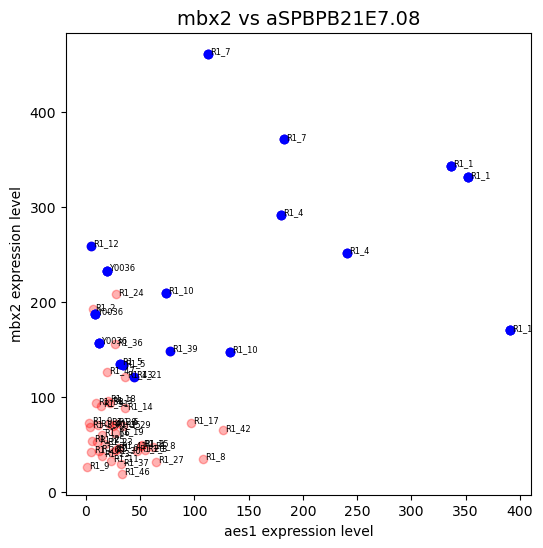

In [104]:
#create a plot of SPNCRNA.1524 vs mbx2
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(data_[ind_names=='SPBPB21E7.08',:],data_[ind_names=='mbx2',:],c='red',alpha=0.3)
ax.set_title("mbx2 vs aSPBPB21E7.08",fontsize=14)
for i in col_names_retained_wo_reps:
    print(i)
    if (snps.loc[snps["position"]==2527314,i].values==1)[0]:
        print(i)
        indices_to_plot= np.array(np.where(np.array(col_names_retained_wo_reps)==i)).flatten()
        ax.scatter(data_[ind_names=='SPBPB21E7.08',indices_to_plot],data_[ind_names=='mbx2',indices_to_plot],c='blue')


ax.set_xlabel('aes1 expression level',fontsize=10)
ax.set_ylabel('mbx2 expression level',fontsize=10)
ax.tick_params(labelsize=10)
#put p-value from wash_df p-value column to 2 significant figures in scientific notation
#plot genotype names

for i in range(data_[ind_names=='SPBPB21E7.08',:].shape[1]):
    #small text
    plt.text(data_[ind_names=='SPBPB21E7.08',:][0,i]+2,data_[ind_names=='mbx2',:][0,i],col_names_retained_wo_reps[i],fontsize=6)

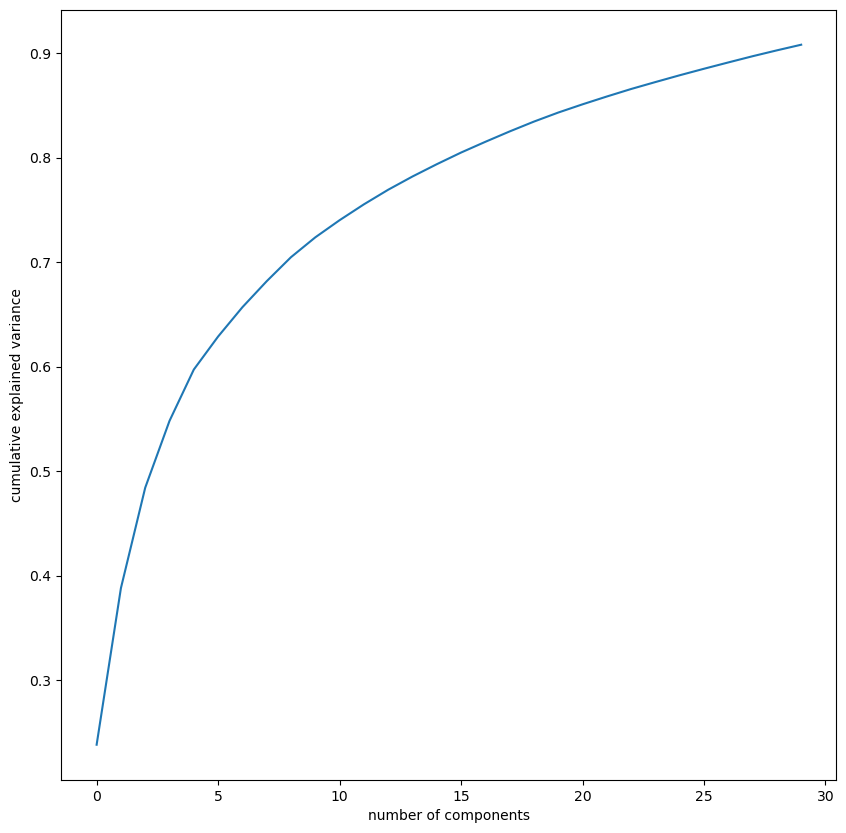

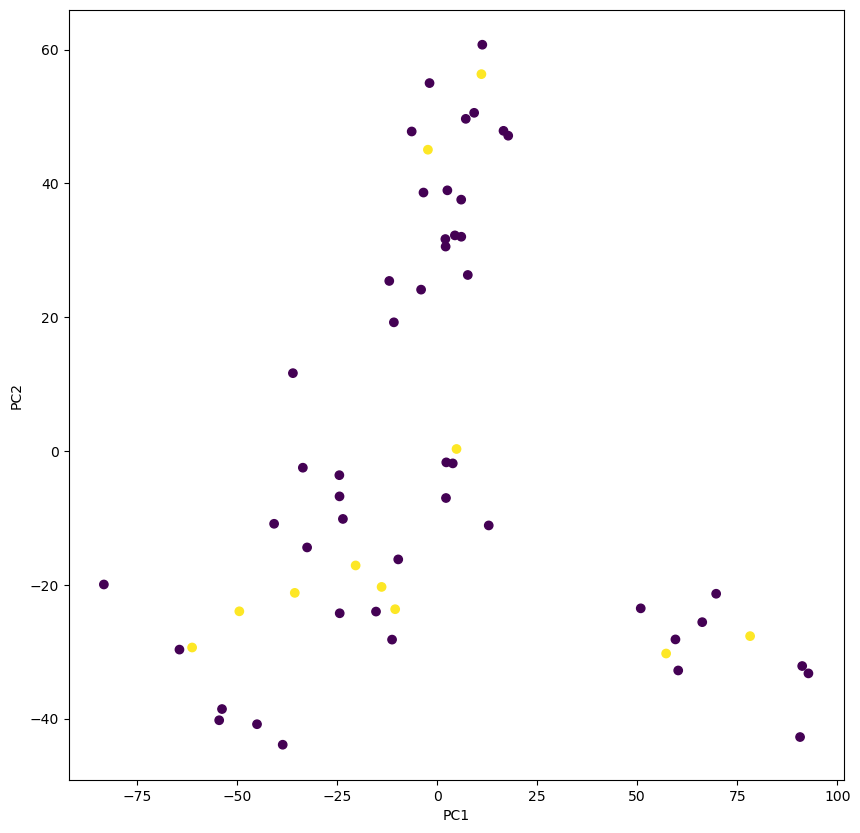

In [105]:
#perform pca of data_ and then plot the first two components, show their explained variance. Color points by wash_pheno
#import PCA tools from sklearn
from sklearn.decomposition import PCA
#center and scale the rows of data_ using sklearn
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_.T).T
#perform pca
pca = PCA(n_components=30)
pca.fit(data_scaled.T)
#plot the explained variance
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#transform the data
data_pca = pca.transform(data_scaled.T)
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.wash_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



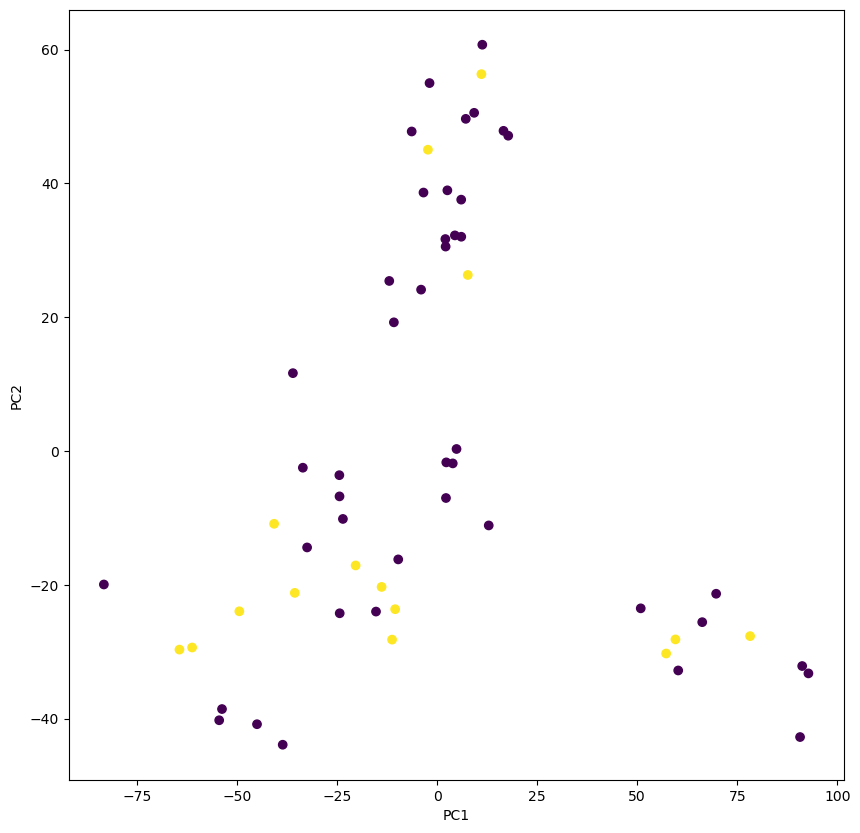

In [106]:
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.filter_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [107]:
#get residuals from mbx2 and phenotypes["washing"]
from sklearn.linear_model import LinearRegression
#make a linear regression model
model = LinearRegression()
#fit the model
model.fit(data_[ind_names=="mbx2",:].T,phenotypes_.washing)
#get the residuals
residuals_wash = phenotypes_.washing-model.predict(data_[ind_names=="mbx2",:].T)
#see if residuals correlate with any gene in the dataset
resid_corr_wash = find_correlated_genes(data_,residuals_wash, False, True)
#fit the model
model.fit(data_[ind_names=="mbx2",:].T,phenotypes_.filtering)
#get the residuals
residuals_filtering= phenotypes_.filtering-model.predict(data_[ind_names=="mbx2",:].T)
#see if residuals correlate with any gene in the dataset
resid_corr_filt = find_correlated_genes(data_,residuals_filtering, False, True)


In [108]:
wash_df.head(50)

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
807,pfl8,0.689211,2.207128e-09,SPAC1F8.06,0.000015,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
4038,pfl3,0.641025,5.941388e-08,SPBC947.04,0.000170,"cell surface glycoprotein, flocculin Pfl3, DIP...","cell surface glycoprotein, flocculin Pfl3, DIP..."
1426,pac2,0.636933,7.654912e-08,SPAC31G5.11,0.000170,cAMP-independent regulatory protein Pac2,cAMP-independent regulatory protein Pac2
5268,SPNCRNA.1083,0.627917,1.320582e-07,SPNCRNA.1083,0.000219,intergenic RNA (predicted),intergenic RNA (predicted)
3423,mbx2,0.618994,2.227591e-07,SPBC317.01,0.000296,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
6431,SPNCRNA.72,0.615117,2.781655e-07,SPNCRNA.72,0.000303,unknown,unknown
3053,SPBC1A4.04,0.612686,3.192474e-07,SPBC1A4.04,0.000303,Schizosaccharomyces specific protein,Schizosaccharomyces specific protein
4059,SPBC9B6.11c,0.608009,4.147887e-07,SPBC9B6.11c,0.000345,CCR4/nocturin family endoribonuclease,CCR4/nocturin family endoribonuclease
506,mfs1,0.601117,6.054657e-07,SPAC17C9.16c,0.000447,plasma membrane xenobiotic transmembrane trans...,plasma membrane xenobiotic transmembrane trans...
1837,bdf2,-0.582194,1.636201e-06,SPAC631.02,0.001087,BET family double bromodomain protein Bdf2,BET family double bromodomain protein Bdf2


In [109]:
#remove entries in filt_df where systematinc_names starts with SPNCRNA
filt_df = filt_df[~filt_df.systematic_names.str.startswith('SPNCRNA')]
#reindex
filt_df = filt_df.reset_index(drop=True)
filt_df

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
0,pfl8,0.769704,1.658823e-12,SPAC1F8.06,1.102288e-08,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
1,pfl3,0.733027,6.056226e-11,SPBC947.04,1.465479e-07,"cell surface glycoprotein, flocculin Pfl3, DIP...","cell surface glycoprotein, flocculin Pfl3, DIP..."
2,mbx2,0.732042,6.616158e-11,SPBC317.01,1.465479e-07,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
3,pfl7,0.680595,4.161536e-09,SPBC359.04c,6.913352e-06,"cell surface glycoprotein, flocculin Pfl7, DIP...","cell surface glycoprotein, flocculin Pfl7, DIP..."
4,pac2,0.664503,1.287229e-08,SPAC31G5.11,1.425607e-05,cAMP-independent regulatory protein Pac2,cAMP-independent regulatory protein Pac2
...,...,...,...,...,...,...,...
5110,smb1,-0.000400,9.976223e-01,SPAC26A3.08,9.982232e-01,Sm snRNP core protein Smb1,Sm snRNP core protein Smb1
5111,mis17,-0.000369,9.978052e-01,SPBC21.01,9.982559e-01,CENP-U ortholog Mis17,CENP-U ortholog Mis17
5112,rna14,0.000123,9.992684e-01,SPAC6F12.17,9.995692e-01,mRNA cleavage and polyadenylation specificity ...,mRNA cleavage and polyadenylation specificity ...
5113,tah18,-0.000062,9.996342e-01,SPAC1296.06,9.997847e-01,CIA machinery NADPH-dependent diflavin oxidore...,CIA machinery NADPH-dependent diflavin oxidore...


In [110]:
#check where is pho1
wash_df[wash_df.gene=='inv1']

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
4631,inv1,0.265758,0.043767,SPCC191.11,0.294236,"external invertase, beta-fructofuranosidase Inv1","external invertase, beta-fructofuranosidase Inv1"


In [111]:
#save 5 databases
#correlated with wash
wash_df.to_csv('wash_corr.csv')
#correlated with filter
filt_df.to_csv('filter_corr.csv')
#significant DE in wash
wash_results.to_csv('wash_DE.csv')
#significant DE in filter
filter_results.to_csv('filter_DE.csv')
#correlated with mbx2
mbx2_corr.to_csv('mbx2_corr.csv')
#correlated with SPNCRNA.1524

#residuals with mbx2 vs. wash
resid_corr_wash.to_csv('resid_corr_wash.csv')
#residuals with mbx2 vs. filtering.
resid_corr_filt.to_csv('resid_corr_filt.csv')

NameError: name 'mbx2_corr' is not defined

In [ ]:
#resid_corr_wash where gene is asp1
resid_corr_wash[resid_corr_wash.gene=="asp1"]

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
4453,asp1,-0.102956,0.441853,SPCC1672.06c,0.724608,diphosphoinositol pentakisphosphate kinase/Ins...,diphosphoinositol pentakisphosphate kinase/Ins...


In [ ]:
wash_df_export = wash_df[wash_df["correlation"]>0].head(100)["systematic_names"].values
#export to csv
np.savetxt("wash_df_export.csv", wash_df_export, delimiter=",", fmt='%s')


filt_df_export = filt_df[filt_df["correlation"]>0].head(100)["systematic_names"].values
#export to csv
np.savetxt("filt_df_export.csv", filt_df_export, delimiter=",", fmt='%s')

In [ ]:
#wash df find SPNCRNA.5774
wash_df[wash_df["systematic_names"]=="SPBPB10D8.03"]

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
4180,SPBPB10D8.03,0.276175,0.035861,SPBPB10D8.03,0.342828,pseudogene transporter,pseudogene transporter


In [ ]:
wash_df.head(50)


,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
807,pfl8,0.670133,8.739613e-09,SPAC1F8.06,0.000058,"cell surface glycoprotein, flocculin Pfl8","cell surface glycoprotein, flocculin Pfl8"
3423,mbx2,0.633210,9.608735e-08,SPBC317.01,0.000319,"DNA-binding transcription factor, MADS-box Pvg4","DNA-binding transcription factor, MADS-box Pvg4"
4038,pfl3,0.620348,2.059869e-07,SPBC947.04,0.000456,"cell surface glycoprotein, flocculin Pfl3, DIP...","cell surface glycoprotein, flocculin Pfl3, DIP..."
5268,SPNCRNA.1083,0.597517,7.351298e-07,SPNCRNA.1083,0.001221,intergenic RNA (predicted),intergenic RNA (predicted)
4059,SPBC9B6.11c,0.587640,1.237025e-06,SPBC9B6.11c,0.001644,CCR4/nocturin family endoribonuclease,CCR4/nocturin family endoribonuclease
6431,SPNCRNA.72,0.582747,1.590690e-06,SPNCRNA.72,0.001762,unknown,unknown
1426,pac2,0.576747,2.153344e-06,SPAC31G5.11,0.002044,cAMP-independent regulatory protein Pac2,cAMP-independent regulatory protein Pac2
506,mfs1,0.573978,2.471399e-06,SPAC17C9.16c,0.002053,plasma membrane xenobiotic transmembrane trans...,plasma membrane xenobiotic transmembrane trans...
3053,SPBC1A4.04,0.564624,3.899882e-06,SPBC1A4.04,0.002879,Schizosaccharomyces specific protein,Schizosaccharomyces specific protein
2850,hop1,-0.550993,7.398401e-06,SPBC1718.02,0.004863,linear element associated protein Hop1,linear element associated protein Hop1


Text(0, 0.5, 'washing')

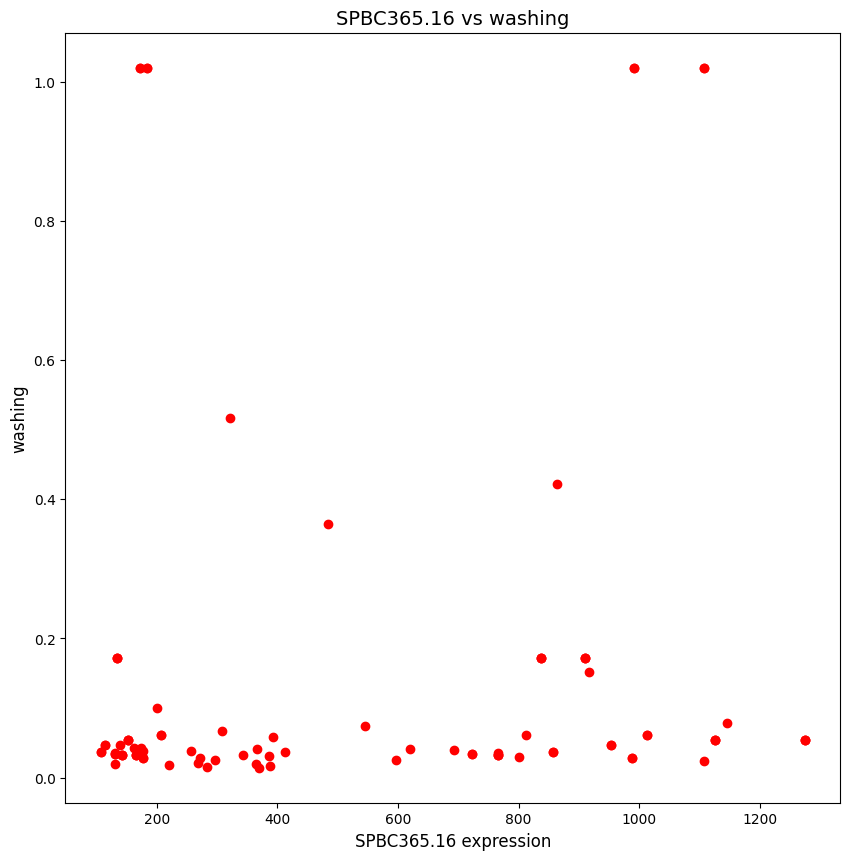

In [ ]:
#give plots of SPBC365.16 vs. washing data
#plot the expression of SPBC365.16 vs. washing data and color by genotype at II:2524266
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("SPBC365.16 vs washing",fontsize=14)
for i in col_names_retained_wo_reps:
    if (snps.loc[snps["position"]==2524266,i].values==1):
        print(i)
        indices_to_plot= np.array(np.where(np.array(col_names_retained_wo_reps)==i)).flatten()
        ax.scatter(data_[ind_names=='SPBC365.16',indices_to_plot],phenotypes_.washing[indices_to_plot],c='blue')
    else:
        indices_to_plot= np.array(np.where(np.array(col_names_retained_wo_reps)==i)).flatten()
        ax.scatter(data_[ind_names=='SPBC365.16',indices_to_plot],phenotypes_.washing[indices_to_plot],c='red')
ax.set_xlabel("SPBC365.16 expression",fontsize=12)
ax.set_ylabel("washing",fontsize=12)






In [ ]:
#in wash df find SPBC365.16
wash_df[wash_df["systematic_names"]=="SPBC365.16"]

,gene,correlation,p-value,systematic_names,p-value adj,function,sense function
3565,SPBC365.16,0.195511,0.141349,SPBC365.16,0.558008,"mitochondrial membrane protein, conserved in y...","mitochondrial membrane protein, conserved in y..."


In [ ]:
ind_names

Index(['mrx11', 'pom34', 'gls2', 'taf11', 'jmj2', 'bqt2', 'SPAC1002.07c',
       'mtf1', 'dld1', 'sgt1',
       ...
       'cbh1-antisense-1', 'mfs1-antisense-1', 'SPNCRNA.992', 'SPNCRNA.993',
       'SPNCRNA.994', 'SPNCRNA.995', 'SPNCRNA.996', 'SPAC637.04-antisense-1',
       'SPNCRNA.998', 'rpn10-antisense-1'],
      dtype='object', length=6737)

Text(0, 0.5, 'gsf1 expression')

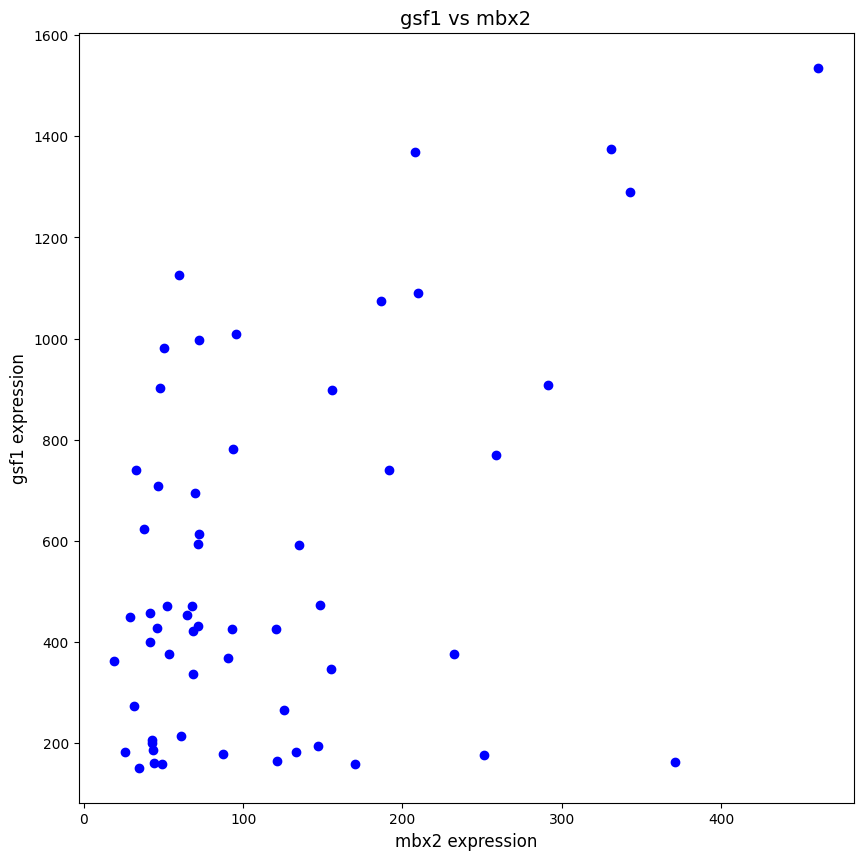

In [ ]:
#plot SPBC15D4.02 (gsf1) vs SPBC317.01 (mbx2)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("gsf1 vs mbx2",fontsize=14)
ax.scatter(data_[ind_names=='mbx2',:],data_[ind_names=='gsf1',:],c='blue')
ax.set_xlabel("mbx2 expression",fontsize=12)
ax.set_ylabel("gsf1 expression",fontsize=12)


Text(0, 0.5, 'gsf1 expression')

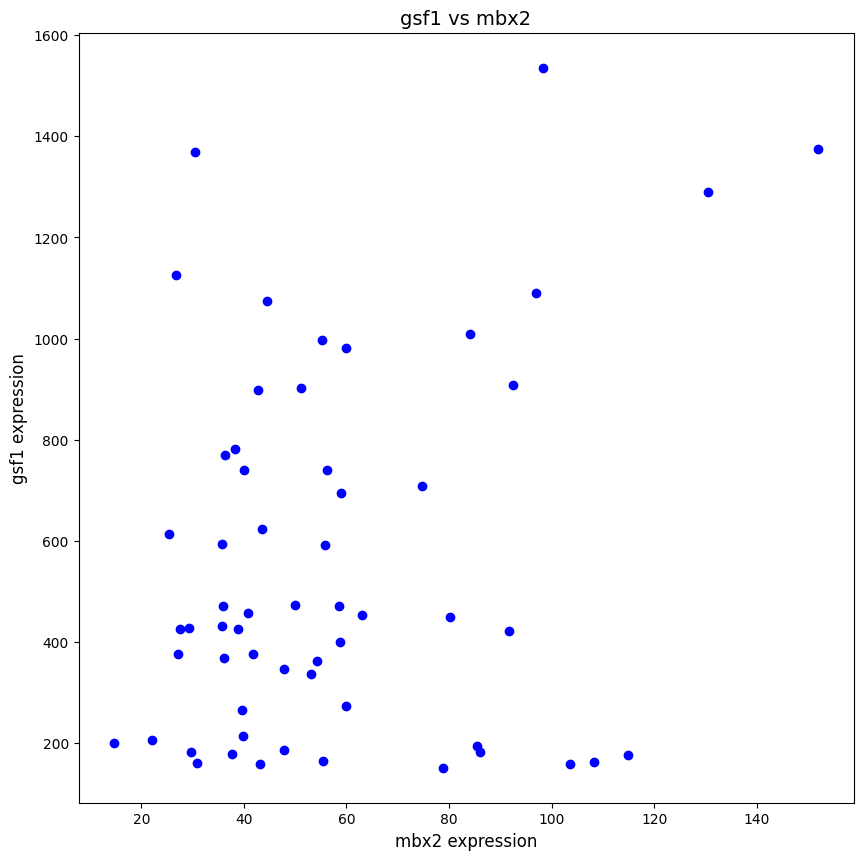

In [ ]:
#plot SPBC15D4.02 (gsf1) vs SPBC317.01 (mbx2)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("gsf1 vs mbx2",fontsize=14)
ax.scatter(data_[ind_names=='SPNCRNA.1524',:],data_[ind_names=='gsf1',:],c='blue')
ax.set_xlabel("SPNCRNA.1524 expression",fontsize=12)
ax.set_ylabel("gsf1 expression",fontsize=12)

#color by genotype at II:2524266


In [147]:
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/updated_genotype_matrix_final_pos.tsv
snps = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/updated_genotype_matrix_final_pos.tsv", sep="\t")

snps = snps[(snps["position"]==2316851)]
#remove first 4 columns
snps = snps.iloc[:,4:]

In [148]:

snps.reset_index(drop=True, inplace=True)
#snps now contains the genotypes at II:2316554
#remove columns with NaNs
for i in snps.columns:
    if (snps[i].isna().any()):
        snps = snps.drop(i,axis=1)

genotype = snps.loc[0].values
   
index_0= snps.columns[genotype==0]
colnames_0 = snps.columns[genotype==0]
index_1= snps.columns[genotype==1]
colnames_1 = snps.columns[genotype==1]
#iterate through enumerate col_names_retained_wo_reps and save the index of the column names in col_index_0 and col_index_1 deoendibgn on genotype
col_index_0 = []
col_index_1 = []
for i in enumerate(col_names_retained_wo_reps):
      if (i[1] in colnames_0):
            col_index_0.append(i[0])
      elif (i[1] in colnames_1):
            col_index_1.append(i[0])


In [149]:
df = pd.DataFrame(columns=["gene","mean_exp_0","mean_exp_1","log2fc","pval","pval_adjust"])
for i in ind_names:
    #get expression of gene i
      gene_exp = data_[ind_names==i,:]
    
      gene_exp_0 = gene_exp[0,col_index_0]
      gene_exp_1 = gene_exp[0,col_index_1]


    #calculate mean expression of gene i for genotype 0
      mean_exp_0 = np.mean(gene_exp_0)
    #calculate mean expression of gene i for genotype 1
      mean_exp_1 = np.mean(gene_exp_1)
    #clculate log2fc
      log2fc = np.log2(mean_exp_1/mean_exp_0)
    #calculate pval
      pval = st.ttest_ind(gene_exp_0,gene_exp_1)[1]
      pval_adjust = pval*len(ind_names)
    #add to df
      df = df.append({"gene":i,"mean_exp_0":mean_exp_0,"mean_exp_1":mean_exp_1,"log2fc":log2fc,"pval":pval,"pval_adjust":pval_adjust},ignore_index=True)
      #print progress
      

df

,gene,mean_exp_0,mean_exp_1,log2fc,pval,pval_adjust
0,mrx11,57.617070,54.117961,-0.090389,0.533449,3593.845448
1,pom34,325.054398,378.547900,0.219795,0.002966,19.983366
2,gls2,2209.524993,2286.559272,0.049442,0.654670,4410.514551
3,taf11,249.580829,270.697743,0.117176,0.170391,1147.924010
4,jmj2,181.729259,161.280116,-0.172222,0.020973,141.297336
...,...,...,...,...,...,...
6732,SPNCRNA.995,62.768791,48.368085,-0.375992,0.059930,403.748477
6733,SPNCRNA.996,47.459613,39.531281,-0.263706,0.179258,1207.659531
6734,SPAC637.04-antisense-1,7.095791,12.051077,0.764127,0.072257,486.792644
6735,SPNCRNA.998,23.213323,28.221166,0.281825,0.093661,630.995969


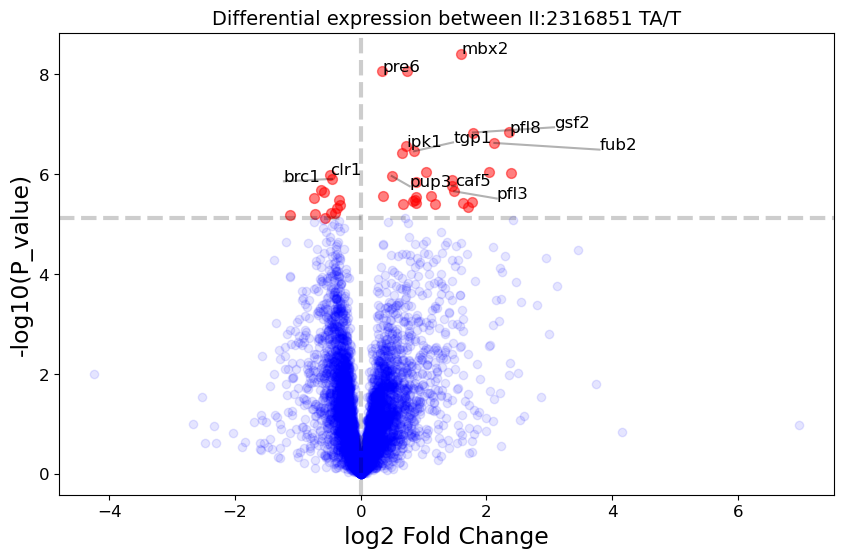

In [150]:
#sort based on pval_adjust
df = df.sort_values(by="pval_adjust")
df.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Differential expression between II:2316851 TA/T")
ax.set_xlabel("log2 Fold Change",fontsize=17)
ax.set_ylabel("-log10(P_value)",fontsize=17)
for i in df.index:
      if (df.loc[i,"pval_adjust"]<0.05):
            ax.scatter(df.loc[i,"log2fc"],-np.log10(df.loc[i,"pval"]),c='red',alpha=0.5,s=50)
      else:
            ax.scatter(df.loc[i,"log2fc"],-np.log10(df.loc[i,"pval"]),c='blue',alpha=0.1)
#plot a horizontal line at -log10(0.05)
#bonferroni correction
bonf=0.05/len(df)
ax.axhline(y=-np.log10(bonf),color='black',linestyle='--', alpha=0.1, linewidth=3)

#plot a vertical line at log2fc=0
ax.axvline(x=0,color='black',linestyle='--', alpha=0.1, linewidth=3)
#plot a horizontal line at -log10(0.05)
ax.axhline(y=-np.log10(bonf),color='black',linestyle='--', alpha=0.1, linewidth=3)
#plot a vertical line at log2fc=0
ax.axvline(x=0,color='black',linestyle='--', alpha=0.1, linewidth=3)
#annotate top 10 genes with their names and make sure these dont overlap. To do this make a matrix of their coordinates and make sure they are far enough apart
matrix = np.zeros((20,2))

for k in range(20):
     
      x = df.loc[k,"log2fc"]
      y = -np.log10(df.loc[k,"pval"])
      
      while (np.min(np.sqrt((matrix[:,0]-x)**2+(matrix[:,1]-y)**2))<0.7):
            #random walk
            if x<0:
                  x = x + np.random.normal(-0.05,0.05)
            else:
                  x = x + np.random.normal(0.05,0.05)
            y = y + np.random.normal(0,0.05)
      
      #if df.loc[k,"gene"] is less than 5 characters long, annotate it 0.1 above the point
      if (len(df.loc[k,"gene"])<5):
            ax.annotate(df.loc[k,"gene"],(x,y),fontsize=12)
            ax.plot([x,df.loc[k,"log2fc"]],[y,-np.log10(df.loc[k,"pval"])],color='black',alpha=0.3)
      else:
            x=x+1000
            y=y+1000
      matrix[k,0] = x
      matrix[k,1] = y
#increase fontsize of axis labels and title
ax.tick_params(labelsize=12)
ax.title.set_fontsize(14)



    


In [ ]:
#save df as srb11_diff_exp.csv
df.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/srb11_diff_exp.csv")

In [143]:
#angeli for flocclation genes
filt_df_genes = filt_df[["systematic_names","p-value adj"]]
sig_genes = filt_df_genes[filt_df_genes["p-value adj"]<0.05]["systematic_names"].values
background_genes = filt_df_genes["systematic_names"].values
#export to this folder /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Angeli
sig_genes = pd.DataFrame(sig_genes)
sig_genes.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Angeli/sig_genes.csv",index=False)
background_genes = pd.DataFrame(background_genes)
background_genes.to_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Angeli/background_filt_genes.txt",index=False)